Import explore data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score, precision_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

df = pd.read_csv('Bank_Customer_Churn_Prediction.csv')

#add new feature
df['balance_active'] = df['balance'] * df['active_member']

# print(df.dtypes)

#missing data
# print(df.isna().sum())

#Country average and user number
churn_rate_country = df.groupby('country')['churn'].agg(lambda x: x.sum() / x.count())
# print(churn_rate_country)

user_num = df.groupby('country')['customer_id'].nunique()
# print(user_num)

#pairplot 
#sns.pairplot(df)
#plt.show()

Data preprocessing and Feature selection and engineering

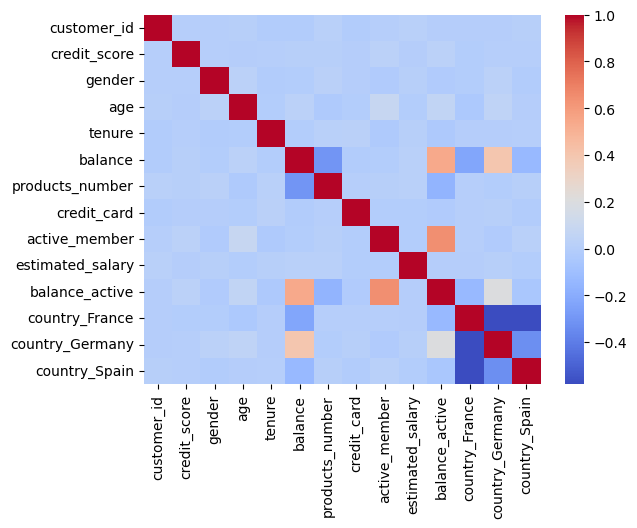

In [169]:
# gender dummy
gender_dict = {'Female': 1, 'Male': 0}
df['gender'] = df['gender'].map(gender_dict)

#country dummy
df_dummies = pd.get_dummies(df['country'], prefix='country', dtype=int)
df = pd.concat([df, df_dummies], axis=1)
df.drop('country',axis =1, inplace = True)
# print(df.dtypes)

target = df['churn']
features = df.drop('churn',axis =1) 

scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)
features_scaled = pd.DataFrame(features_scaled, columns = features.columns)
# print(features.describe())

#heatmap 
sns.heatmap(features_scaled.corr(), annot=False, cmap='coolwarm')
plt.show()

# drop unique identifiers
features_scaled = features_scaled.drop('customer_id', axis=1)


Logistic Regression

In [170]:
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target,train_size=0.8, random_state= 0)

clf = LogisticRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test,y_pred)
print(f'accuracy score: {accuracy}')

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(f'precision score: {precision}')
print(f'recall score: {recall}')
print(f'f1 score: {f1}')

accuracy score: 0.812
precision score: 0.5900621118012422
recall score: 0.2345679012345679
f1 score: 0.33568904593639576


Random Forests

In [171]:
rf = RandomForestClassifier(random_state= 0, class_weight='balanced')
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

precision = precision_score(y_test,y_pred)
recall = recall_score(y_test,y_pred)
f1 = f1_score(y_test,y_pred)

print(f'precision score: {precision}')
print(f'recall score: {recall}')
print(f'f1 score: {f1}')



precision score: 0.7669172932330827
recall score: 0.5037037037037037
f1 score: 0.6080476900149031


Model tuning

In [172]:
param_grid = {
    'n_estimators': range(50, 250, 20),  
    "max_depth": [5, 10, 15, None],      
    "max_features": ['sqrt', 'log2', None],  
    "bootstrap": [True, False]
}

# RandomizedSearchCV
grid_search = RandomizedSearchCV(rf, param_grid, cv=3, scoring= 'f1')
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
print(f'f1 score: {grid_search.best_score_}')

{'n_estimators': 210, 'max_features': 'log2', 'max_depth': 10, 'bootstrap': False}
f1 score: 0.613213593312978


Feature importances

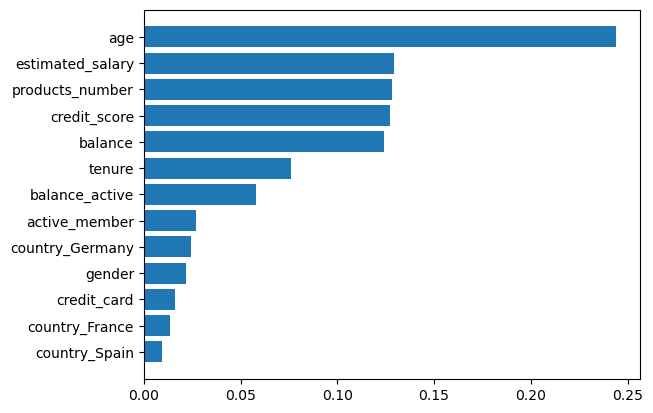

In [173]:
importances = feature_importances = rf.feature_importances_
sorted_index = np.argsort(importances)
labels = X_train.columns[sorted_index]

# Create plot
plt.barh(range(X_train.shape[1]), importances[sorted_index], tick_label=labels)
plt.show()
